# Estimación de la ocurrencia de precios extremos en el Mercado Eléctrico Mayorista de México (2023)



In [2]:
!pip install tradingeconomics
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 515.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 8.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from datetime import date

from pandas_datareader.data import DataReader
series_code = 'EFFR'
data_source = 'fred'
start = date(2017, 1, 1)

import yfinance as yf
import pandas as pd
import numpy as np
import statistics as stats

from scipy.stats import chi2

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RANSACRegressor, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, precision_score, accuracy_score, f1_score, classification_report, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


# Creación de Dataset

## Dataset energia

In [4]:
df_energy = pd.read_excel("/content/drive/MyDrive/Colab_Notebooks/MaestriaEconomia/Tesis/Datasets/Energia/DemandaResidual_PML_diario.xlsx")

df_energy['fecha'] = pd.to_datetime(df_energy['FECHA'])
df_energy['Date'] = pd.to_datetime(df_energy['FECHA'])

df_energy.set_index(df_energy['Date'], inplace = True)


df_energy.head(10)

,FECHA,CLV_CONCEPTO,PML_MDA,MONTO,FOTOVOLTAICA,TERMICA,BIOMASA,TURBOGAS,EOLICA,COMBUSTION_INTERNA,GEOTERMOELECTRICA,HIDROELECTRICA,CICLO_COMBINADO,NUCLEOELECTRICA,CARBOELECTRICA,LOAD_MW,RESID_DEMAND_MW,fecha,Date
Date,,,,,,,,,,,,,,,,,,,
2016-01-27,2016-01-27,PaEneGen_MDA,323.91,1.084728e+07,24.24,2464.800,NaN,0.00,39.959,NaN,9872.60,NaN,21210.58,NaN,NaN,NaN,NaN,2016-01-27,2016-01-27
2016-01-28,2016-01-28,PaEneGen_MDA,337.00,1.094821e+07,20.81,2464.800,NaN,0.00,39.644,NaN,9902.70,NaN,20176.74,NaN,NaN,NaN,NaN,2016-01-28,2016-01-28
2016-01-29,2016-01-29,PaEneGen_MDA,721.92,5.321796e+08,399.02,57611.920,18.58,39642.91,50155.441,1309.93,15016.75,76269.32,406132.32,16107.72,89285.32,26046.89,20762.57,2016-01-29,2016-01-29
2016-01-30,2016-01-30,PaEneGen_MDA,698.59,4.772423e+08,391.77,53581.350,18.56,39874.27,32890.642,1295.81,15049.25,64521.53,398523.01,16036.40,83449.75,25326.18,21251.02,2016-01-30,2016-01-30
2016-01-31,2016-01-31,PaEneGen_MDA,504.76,3.041529e+08,366.68,29720.980,17.57,35204.86,30092.145,1277.69,15779.17,57391.89,378209.69,15952.87,54500.90,22110.99,18450.54,2016-01-31,2016-01-31
2016-02-01,2016-02-01,PaEneGen_MDA,596.27,3.853331e+08,359.90,50250.019,25.00,37298.43,37715.496,1276.21,15756.23,61813.97,353964.82,15841.99,78322.58,23030.64,18868.58,2016-02-01,2016-02-01
2016-02-02,2016-02-02,PaEneGen_MDA,699.03,4.879124e+08,369.48,85353.903,14.62,38663.82,21293.184,1227.15,15736.25,70260.48,372957.45,15841.99,88658.06,25768.89,21938.75,2016-02-02,2016-02-02
2016-02-03,2016-02-03,PaEneGen_MDA,697.97,5.015292e+08,356.07,97805.690,19.54,39459.91,19575.068,1219.98,16209.31,72948.63,385348.99,15612.96,89622.68,26887.46,23017.47,2016-02-03,2016-02-03
2016-02-04,2016-02-04,PaEneGen_MDA,655.64,4.682157e+08,393.16,84859.000,19.64,39001.55,34987.912,1187.20,15885.10,74041.90,378619.89,15506.08,88442.97,25980.06,21420.77,2016-02-04,2016-02-04


In [5]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2805 entries, 2016-01-27 to 2023-10-01
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   FECHA               2805 non-null   datetime64[ns]
 1   CLV_CONCEPTO        2805 non-null   object        
 2   PML_MDA             2805 non-null   float64       
 3   MONTO               2805 non-null   float64       
 4   FOTOVOLTAICA        2805 non-null   float64       
 5   TERMICA             2805 non-null   float64       
 6   BIOMASA             2803 non-null   float64       
 7   TURBOGAS            2805 non-null   float64       
 8   EOLICA              2805 non-null   float64       
 9   COMBUSTION_INTERNA  2803 non-null   float64       
 10  GEOTERMOELECTRICA   2805 non-null   float64       
 11  HIDROELECTRICA      2803 non-null   float64       
 12  CICLO_COMBINADO     2805 non-null   float64       
 13  NUCLEOELECTRICA     2803 non-n

In [6]:
columns = ['fecha', 'Date', 'FECHA', 'PML_MDA', 'LOAD_MW',	'RESID_DEMAND_MW']

df_energy = df_energy[columns]

In [7]:
df_energy.info()

print(df_energy.index)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2805 entries, 2016-01-27 to 2023-10-01
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   fecha            2805 non-null   datetime64[ns]
 1   Date             2805 non-null   datetime64[ns]
 2   FECHA            2805 non-null   datetime64[ns]
 3   PML_MDA          2805 non-null   float64       
 4   LOAD_MW          2803 non-null   float64       
 5   RESID_DEMAND_MW  2803 non-null   float64       
dtypes: datetime64[ns](3), float64(3)
memory usage: 153.4 KB
DatetimeIndex(['2016-01-27', '2016-01-28', '2016-01-29', '2016-01-30',
               '2016-01-31', '2016-02-01', '2016-02-02', '2016-02-03',
               '2016-02-04', '2016-02-05',
               ...
               '2023-09-22', '2023-09-23', '2023-09-24', '2023-09-25',
               '2023-09-26', '2023-09-27', '2023-09-28', '2023-09-29',
               '2023-09-30', '2023-10-01'],
 

In [8]:
# Revisión de valores nulos
total = df_energy.isnull().sum().sort_values(ascending=True)
percent = total/ df_energy.isnull().count() * 100

df_null = pd.concat([total, percent], axis=1, keys=['total', 'percent']).T

df_null

,fecha,Date,FECHA,PML_MDA,LOAD_MW,RESID_DEMAND_MW
total,0.0,0.0,0.0,0.0,2.000000,2.000000
percent,0.0,0.0,0.0,0.0,0.071301,0.071301


In [9]:
	#Imputation
df_energy['LOAD_MW'] = df_energy['LOAD_MW'].fillna(df_energy['LOAD_MW'].median())
df_energy['RESID_DEMAND_MW'] = df_energy['RESID_DEMAND_MW'].fillna(df_energy['RESID_DEMAND_MW'].median())


<ipython-input-9-202341b73a4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy['LOAD_MW'] = df_energy['LOAD_MW'].fillna(df_energy['LOAD_MW'].median())
<ipython-input-9-202341b73a4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy['RESID_DEMAND_MW'] = df_energy['RESID_DEMAND_MW'].fillna(df_energy['RESID_DEMAND_MW'].median())


Text(0.5, 0, 'Demanda Residual MW')

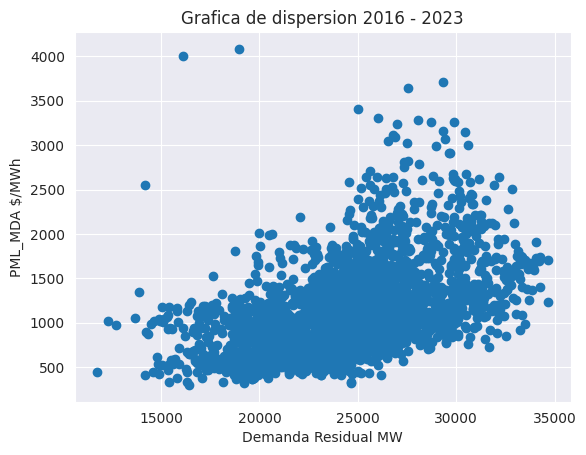

In [10]:
sns.set_style("darkgrid")

x_scatter = df_energy['RESID_DEMAND_MW']
y_scatter = df_energy['PML_MDA']

plt.scatter(x_scatter, y_scatter)
plt.title('Grafica de dispersion 2016 - 2023')
plt.ylabel('PML_MDA $/MWh')
plt.xlabel('Demanda Residual MW')

Text(0.5, 0, 'Demanda Residual')

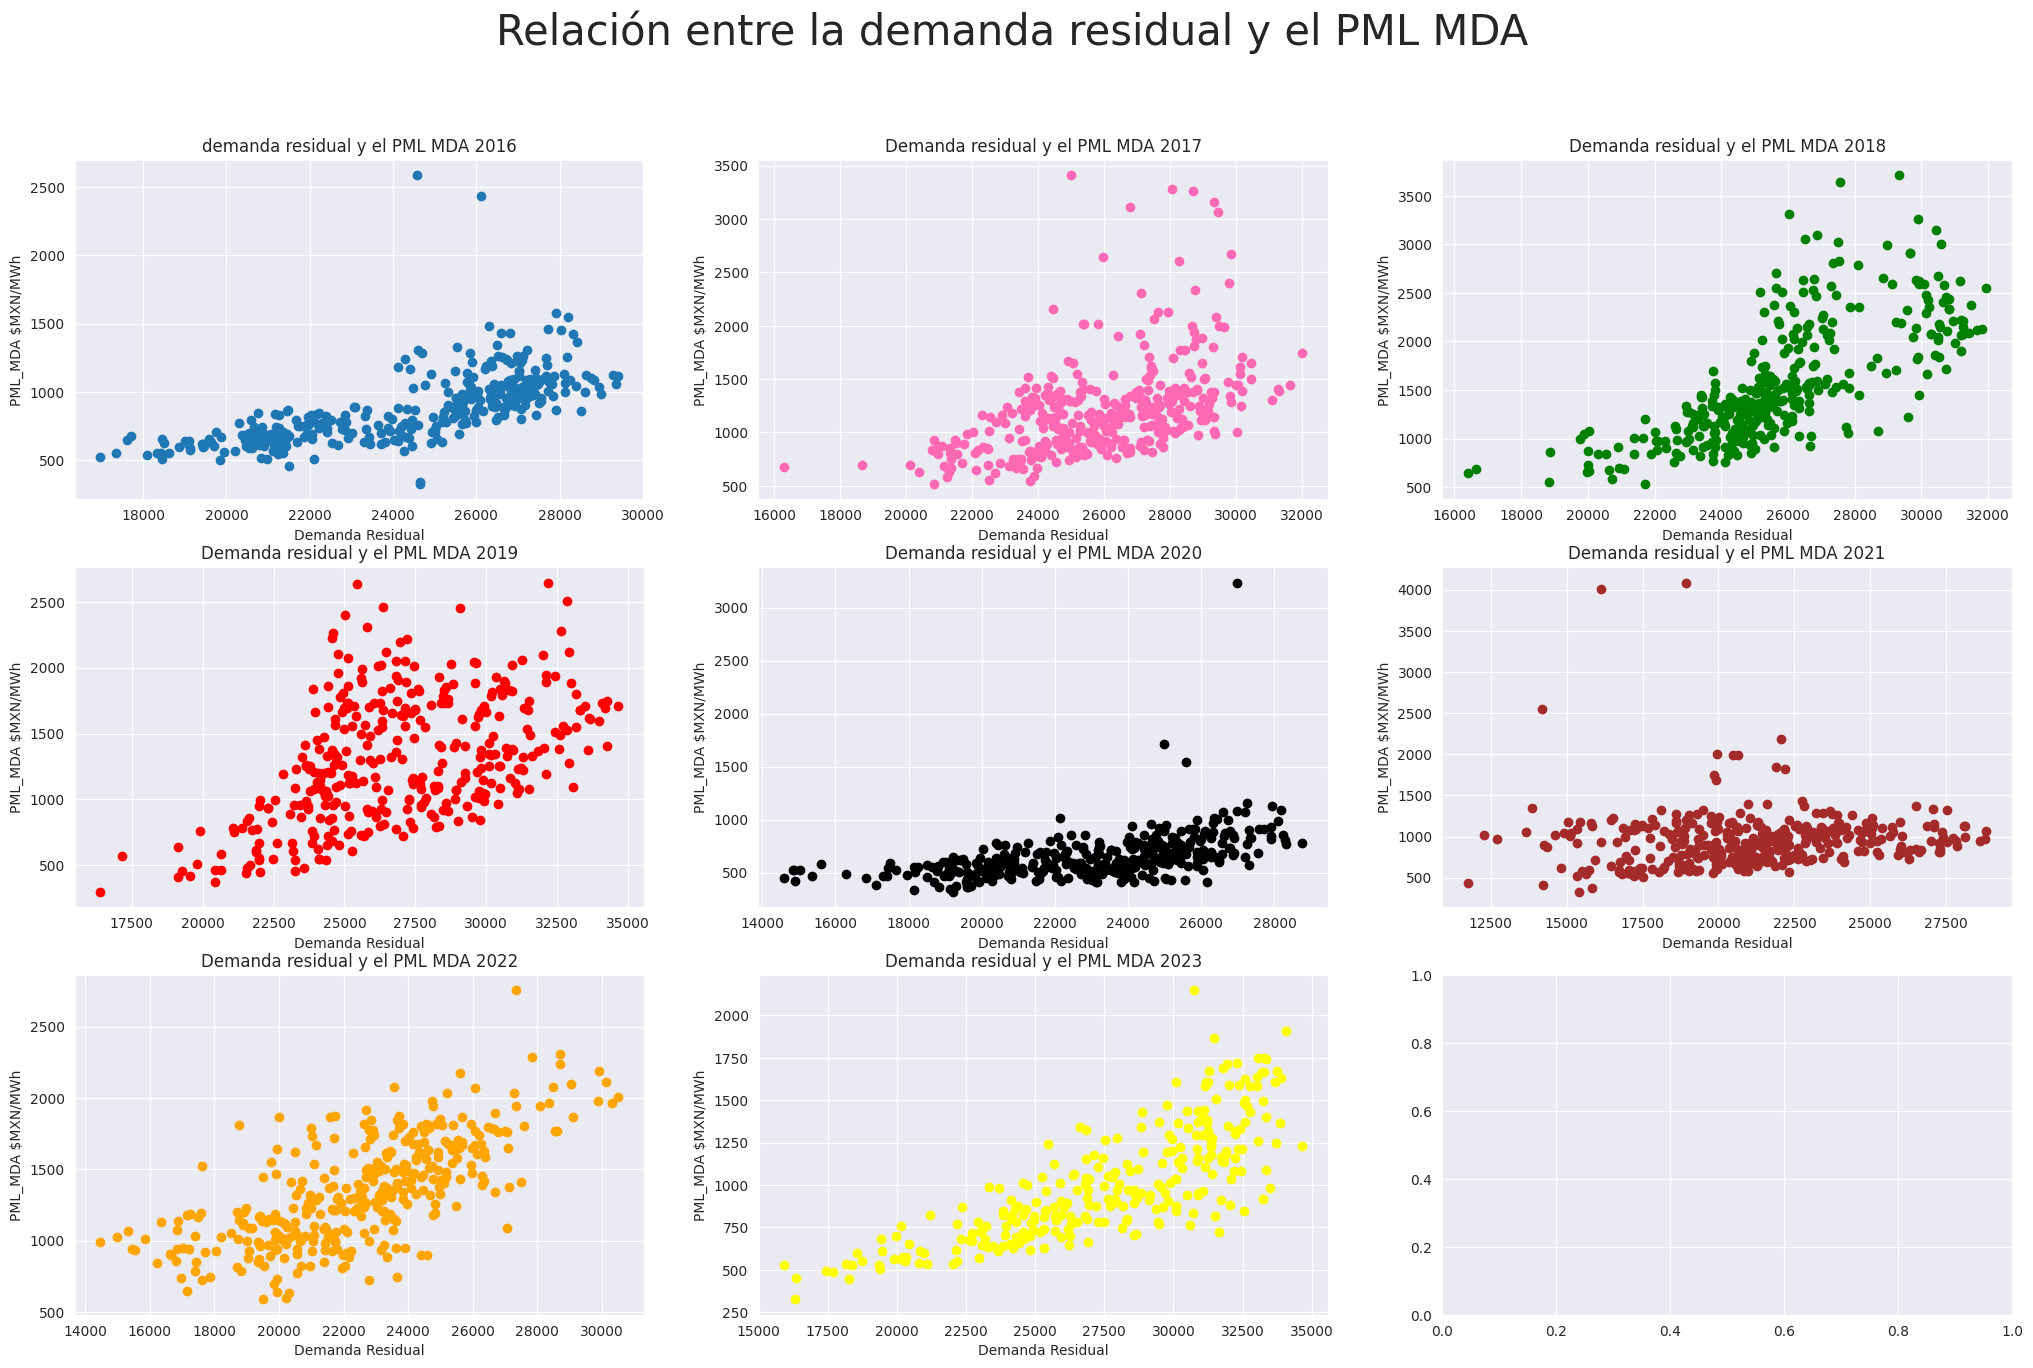

In [11]:
df_query_2016 = df_energy.loc[(df_energy['fecha'] >= '2016-01-01') & (df_energy['fecha'] < '2017-01-01') ]
x_scatter_2016 = df_query_2016['RESID_DEMAND_MW']
y_scatter_2016 = df_query_2016['PML_MDA']

df_query_2017 = df_energy.loc[(df_energy['fecha'] >= '2017-01-01') & (df_energy['fecha'] < '2018-01-01') ]
x_scatter_2017 = df_query_2017['RESID_DEMAND_MW']
y_scatter_2017 = df_query_2017['PML_MDA']

df_query_2018 = df_energy.loc[(df_energy['fecha'] >= '2018-01-01') & (df_energy['fecha'] < '2019-01-01') ]
x_scatter_2018 = df_query_2018['RESID_DEMAND_MW']
y_scatter_2018 = df_query_2018['PML_MDA']

df_query_2019 = df_energy.loc[(df_energy['fecha'] >= '2019-01-01') & (df_energy['fecha'] < '2020-01-01') ]
x_scatter_2019 = df_query_2019['RESID_DEMAND_MW']
y_scatter_2019 = df_query_2019['PML_MDA']

df_query_2020 = df_energy.loc[(df_energy['fecha'] >= '2020-01-01') & (df_energy['fecha'] < '2021-01-01') ]
x_scatter_2020 = df_query_2020['RESID_DEMAND_MW']
y_scatter_2020 = df_query_2020['PML_MDA']

df_query_2021 = df_energy.loc[(df_energy['fecha'] >= '2021-01-01') & (df_energy['fecha'] < '2022-01-01') ]
x_scatter_2021 = df_query_2021['RESID_DEMAND_MW']
y_scatter_2021 = df_query_2021['PML_MDA']


df_query_2022 = df_energy.loc[(df_energy['fecha'] >= '2022-01-01') & (df_energy['fecha'] < '2023-01-01') ]
x_scatter_2022 = df_query_2022['RESID_DEMAND_MW']
y_scatter_2022 = df_query_2022['PML_MDA']

df_query_2023 = df_energy.loc[(df_energy['fecha'] >= '2023-01-01') & (df_energy['fecha'] < '2024-01-01') ]
x_scatter_2023 = df_query_2023['RESID_DEMAND_MW']
y_scatter_2023 = df_query_2023['PML_MDA']



sns.set_style("darkgrid")

fig, axs = plt.subplots(3,3, figsize=(25, 15))
fig.suptitle('Relación entre la demanda residual y el PML MDA', fontsize=30)

axs[0,0].scatter(x_scatter_2016, y_scatter_2016)
axs[0,0].set_title('demanda residual y el PML MDA 2016')
axs[0,0].set_ylabel('PML_MDA $MXN/MWh')
axs[0,0].set_xlabel('Demanda Residual')

axs[0,1].scatter(x_scatter_2017, y_scatter_2017, color = 'hotpink')
axs[0,1].set_title('Demanda residual y el PML MDA 2017')
axs[0,1].set_ylabel('PML_MDA $MXN/MWh')
axs[0,1].set_xlabel('Demanda Residual')


axs[0,2].scatter(x_scatter_2018, y_scatter_2018, color = 'green')
axs[0,2].set_title('Demanda residual y el PML MDA 2018')
axs[0,2].set_ylabel('PML_MDA $MXN/MWh')
axs[0,2].set_xlabel('Demanda Residual')

axs[1,0].scatter(x_scatter_2019, y_scatter_2019, color = 'red')
axs[1,0].set_title('Demanda residual y el PML MDA 2019')
axs[1,0].set_ylabel('PML_MDA $MXN/MWh')
axs[1,0].set_xlabel('Demanda Residual')

axs[1,1].scatter(x_scatter_2020, y_scatter_2020, color = 'black')
axs[1,1].set_title('Demanda residual y el PML MDA 2020')
axs[1,1].set_ylabel('PML_MDA $MXN/MWh')
axs[1,1].set_xlabel('Demanda Residual')

axs[1,2].scatter(x_scatter_2021, y_scatter_2021, color = 'brown')
axs[1,2].set_title('Demanda residual y el PML MDA 2021')
axs[1,2].set_ylabel('PML_MDA $MXN/MWh')
axs[1,2].set_xlabel('Demanda Residual')

axs[2,0].scatter(x_scatter_2022, y_scatter_2022, color = 'orange')
axs[2,0].set_title('Demanda residual y el PML MDA 2022')
axs[2,0].set_ylabel('PML_MDA $MXN/MWh')
axs[2,0].set_xlabel('Demanda Residual')

axs[2,1].scatter(x_scatter_2023, y_scatter_2023, color = 'yellow')
axs[2,1].set_title('Demanda residual y el PML MDA 2023')
axs[2,1].set_ylabel('PML_MDA $MXN/MWh')
axs[2,1].set_xlabel('Demanda Residual')

# plt.scatter(x_scatter_2022, y_scatter_2022)
# plt.title('Grafica de dispersion 2022')
# plt.ylabel('PML_MDA $/MWh')
# plt.xlabel('Demanda Residual MW')

Text(0.5, 0, 'Demanda Residual')

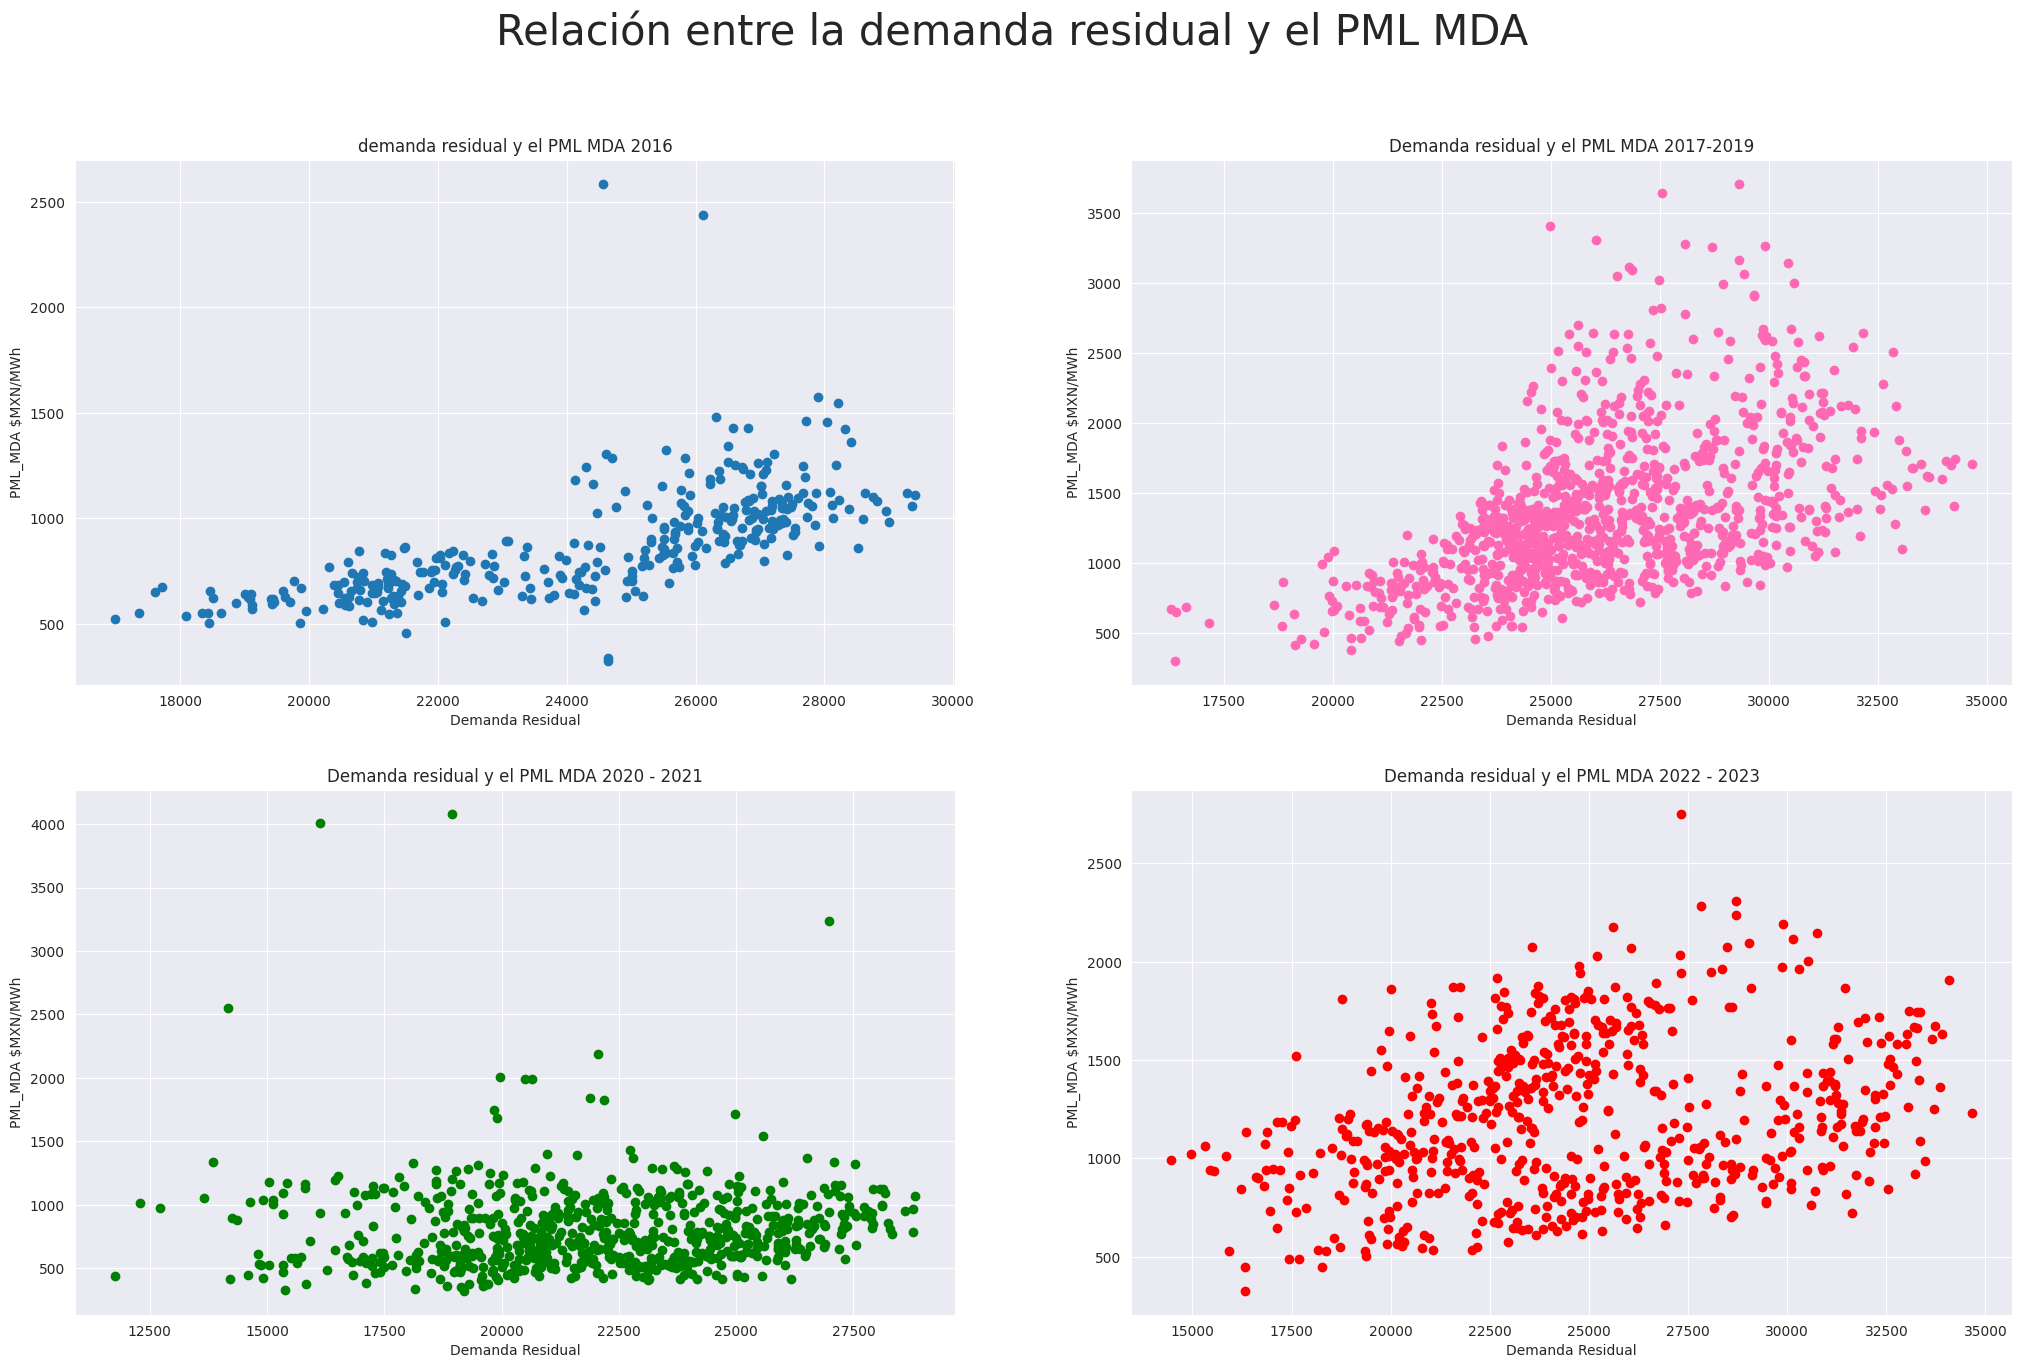

In [12]:
df_query_2016 = df_energy.loc[(df_energy['fecha'] >= '2016-01-01') & (df_energy['fecha'] < '2017-01-01') ]
x_scatter_2016 = df_query_2016['RESID_DEMAND_MW']
y_scatter_2016 = df_query_2016['PML_MDA']

df_query_2017_2019 = df_energy.loc[(df_energy['fecha'] >= '2017-01-01') & (df_energy['fecha'] < '2020-01-01') ]
x_scatter_2017_2019 = df_query_2017_2019['RESID_DEMAND_MW']
y_scatter_2017_2019 = df_query_2017_2019['PML_MDA']

df_query_2020_2021 = df_energy.loc[(df_energy['fecha'] >= '2020-01-01') & (df_energy['fecha'] < '2022-01-01') ]
x_scatter_2020_2021 = df_query_2020_2021['RESID_DEMAND_MW']
y_scatter_2020_2021 = df_query_2020_2021['PML_MDA']

df_query_2022_2023 = df_energy.loc[(df_energy['fecha'] >= '2022-01-01') & (df_energy['fecha'] < '2024-01-01') ]
x_scatter_2022_2023 = df_query_2022_2023['RESID_DEMAND_MW']
y_scatter_2022_2023 = df_query_2022_2023['PML_MDA']


sns.set_style("darkgrid")

fig, axs = plt.subplots(2,2, figsize=(25, 15))
fig.suptitle('Relación entre la demanda residual y el PML MDA', fontsize=30)

axs[0,0].scatter(x_scatter_2016, y_scatter_2016)
axs[0,0].set_title('demanda residual y el PML MDA 2016')
axs[0,0].set_ylabel('PML_MDA $MXN/MWh')
axs[0,0].set_xlabel('Demanda Residual')

axs[0,1].scatter(x_scatter_2017_2019, y_scatter_2017_2019, color = 'hotpink')
axs[0,1].set_title('Demanda residual y el PML MDA 2017-2019')
axs[0,1].set_ylabel('PML_MDA $MXN/MWh')
axs[0,1].set_xlabel('Demanda Residual')


axs[1,0].scatter(x_scatter_2020_2021, y_scatter_2020_2021, color = 'green')
axs[1,0].set_title('Demanda residual y el PML MDA 2020 - 2021')
axs[1,0].set_ylabel('PML_MDA $MXN/MWh')
axs[1,0].set_xlabel('Demanda Residual')

axs[1,1].scatter(x_scatter_2022_2023, y_scatter_2022_2023, color = 'red')
axs[1,1].set_title('Demanda residual y el PML MDA 2022 - 2023')
axs[1,1].set_ylabel('PML_MDA $MXN/MWh')
axs[1,1].set_xlabel('Demanda Residual')


Text(0.5, 0, 'Demanda Residual')

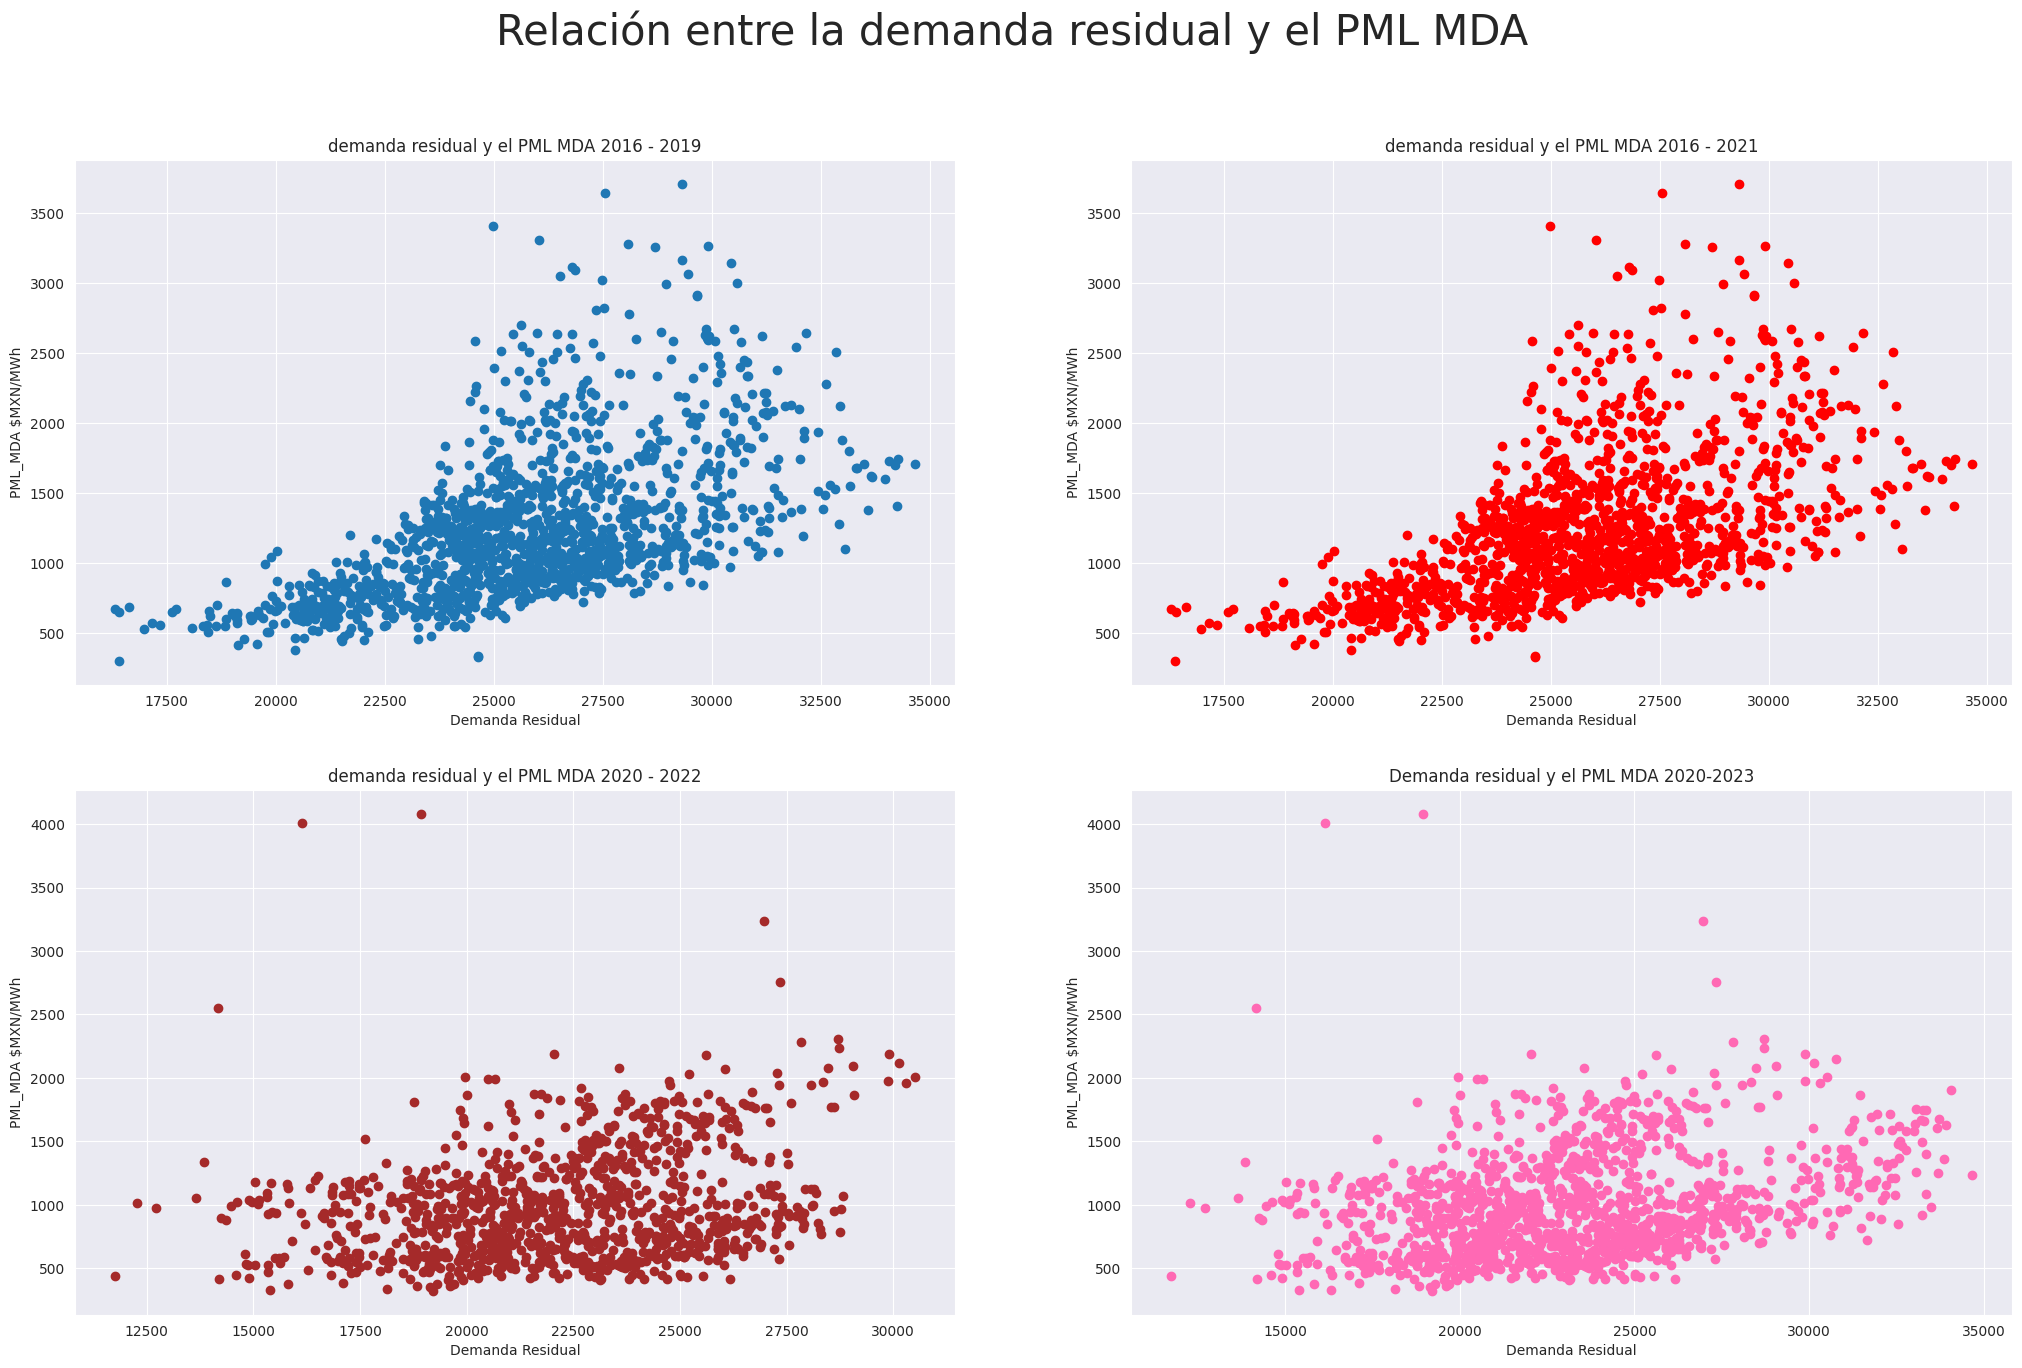

In [13]:
df_query_2016_2019 = df_energy.loc[(df_energy['fecha'] >= '2016-01-01') & (df_energy['fecha'] < '2020-01-01') ]
x_scatter_2016_2019 = df_query_2016_2019['RESID_DEMAND_MW']
y_scatter_2016_2019 = df_query_2016_2019['PML_MDA']

df_query_2016_2021 = df_energy.loc[(df_energy['fecha'] >= '2016-01-01') & (df_energy['fecha'] < '2022-01-01') ]
x_scatter_2016_2021 = df_query_2016_2019['RESID_DEMAND_MW']
y_scatter_2016_2021 = df_query_2016_2019['PML_MDA']

df_query_2020_2022 = df_energy.loc[(df_energy['fecha'] >= '2020-01-01') & (df_energy['fecha'] < '2023-01-01') ]
x_scatter_2020_2022 = df_query_2020_2022['RESID_DEMAND_MW']
y_scatter_2020_2022 = df_query_2020_2022['PML_MDA']

df_query_2020_2023 = df_energy.loc[(df_energy['fecha'] >= '2020-01-01') & (df_energy['fecha'] < '2024-01-01') ]
x_scatter_2020_2023 = df_query_2020_2023['RESID_DEMAND_MW']
y_scatter_2020_2023 = df_query_2020_2023['PML_MDA']



fig, axs = plt.subplots(2,2, figsize=(25, 15))
fig.suptitle('Relación entre la demanda residual y el PML MDA', fontsize=30)

axs[0,0].scatter(x_scatter_2016_2019, y_scatter_2016_2019)
axs[0,0].set_title('demanda residual y el PML MDA 2016 - 2019')
axs[0,0].set_ylabel('PML_MDA $MXN/MWh')
axs[0,0].set_xlabel('Demanda Residual')

axs[0,1].scatter(x_scatter_2016_2021, y_scatter_2016_2021, color = 'red')
axs[0,1].set_title('demanda residual y el PML MDA 2016 - 2021')
axs[0,1].set_ylabel('PML_MDA $MXN/MWh')
axs[0,1].set_xlabel('Demanda Residual')

axs[1,0].scatter(x_scatter_2020_2022, y_scatter_2020_2022, color= 'brown')
axs[1,0].set_title('demanda residual y el PML MDA 2020 - 2022')
axs[1,0].set_ylabel('PML_MDA $MXN/MWh')
axs[1,0].set_xlabel('Demanda Residual')

axs[1,1].scatter(x_scatter_2020_2023, y_scatter_2020_2023, color = 'hotpink')
axs[1,1].set_title('Demanda residual y el PML MDA 2020-2023')
axs[1,1].set_ylabel('PML_MDA $MXN/MWh')
axs[1,1].set_xlabel('Demanda Residual')




## Regresion histórica

In [14]:
y_resid = df_energy['RESID_DEMAND_MW']
resid_2 = y_resid ** 2
resid_3 = y_resid ** 3

df_energy['resid'] = y_resid
df_energy['resid_2'] = y_resid ** 2
df_energy['resid_3'] = y_resid ** 3

x_features = ['resid','resid_2', 'resid_3']
x_features_1 = ['resid','resid_2']
#x_features_1 = ['resid','resid_2', 'resid_3', 'Índice (MXN/MWh)', 'CoalPrice_tc']
#x_features_2 = ['resid_sa','resid_sa_2', 'resid_sa_2', 'Índice (MXN/MWh)', 'CoalPrice_tc']

y = df_energy['PML_MDA']
#y = df_rwc['pmlMDA_sa']
X = df_energy[x_features]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)


print(X_train)

               resid       resid_2       resid_3
Date                                            
2022-05-11  23021.87  5.300065e+08  1.220174e+13
2022-06-06  24933.72  6.216904e+08  1.550105e+13
2018-07-15  25290.76  6.396225e+08  1.617654e+13
2016-08-02  26164.45  6.845784e+08  1.791162e+13
2016-07-15  26591.44  7.071047e+08  1.880293e+13
...              ...           ...           ...
2020-07-22  27894.86  7.781232e+08  2.170564e+13
2019-01-26  22308.25  4.976580e+08  1.110188e+13
2019-03-02  25794.79  6.653712e+08  1.716311e+13
2019-08-13  31527.22  9.939656e+08  3.133697e+13
2018-06-05  27277.34  7.440533e+08  2.029579e+13

[2524 rows x 3 columns]


In [15]:
# Build - fit model
X_train = sm.add_constant(X_train)
print(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()

print(results.params)

print(results.summary())

            const     resid       resid_2       resid_3
Date                                                   
2022-05-11    1.0  23021.87  5.300065e+08  1.220174e+13
2022-06-06    1.0  24933.72  6.216904e+08  1.550105e+13
2018-07-15    1.0  25290.76  6.396225e+08  1.617654e+13
2016-08-02    1.0  26164.45  6.845784e+08  1.791162e+13
2016-07-15    1.0  26591.44  7.071047e+08  1.880293e+13
...           ...       ...           ...           ...
2020-07-22    1.0  27894.86  7.781232e+08  2.170564e+13
2019-01-26    1.0  22308.25  4.976580e+08  1.110188e+13
2019-03-02    1.0  25794.79  6.653712e+08  1.716311e+13
2019-08-13    1.0  31527.22  9.939656e+08  3.133697e+13
2018-06-05    1.0  27277.34  7.440533e+08  2.029579e+13

[2524 rows x 4 columns]
const      5.427599e-06
resid      4.289138e-02
resid_2   -4.749063e-07
resid_3    2.279002e-11
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                PML_MDA   R-squared:       

## Dataset variables control (precios del carbon, gas natural)
* Standard & Poors Daily Natural Gas
* Coal (API2) CIF ARA (ARGUS-McCl (MTF=F)

In [16]:
#df_coal_yf = yf.download('MTF%3DF')
df_coal_yf = yf.Ticker('MTF%3DF').history(start='2016-01-01', end='2023-10-31')
selectedColumns = ['Open', 'Close']
df_coal_yf = df_coal_yf[selectedColumns]
rename_dict = {'Open': 'Coal_Index_Open', 'Close': 'Coal_Index_Close'}

df_coal_yf = df_coal_yf.rename(columns=rename_dict)

#df_coal_yf['Date'] = pd.to_datetime(df_coal_yf.index)
df_coal_yf['Date'] = pd.to_datetime(df_coal_yf.index.tz_convert(None))
df_coal_yf['Date'] = pd.to_datetime(df_coal_yf['Date'].dt.strftime('%Y-%m-%d'))
df_coal_yf.set_index("Date", inplace = True)   # setting first name as index column

print(df_coal_yf.info())
df_coal_yf.head(10)





<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1945 entries, 2016-01-05 to 2023-10-30
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Coal_Index_Open   1945 non-null   float64
 1   Coal_Index_Close  1945 non-null   float64
dtypes: float64(2)
memory usage: 45.6 KB
None


,Coal_Index_Open,Coal_Index_Close
Date,,
2016-01-05,47.750000,47.750000
2016-01-06,48.400002,48.400002
2016-01-07,48.500000,48.500000
2016-01-08,47.200001,47.200001
2016-01-11,46.700001,46.700001
2016-01-12,46.200001,46.200001
2016-01-13,45.849998,45.849998
2016-01-14,45.849998,45.849998
2016-01-15,45.400002,45.400002


In [24]:
path = '/content/drive/MyDrive/Colab_Notebooks/MaestriaEconomia/Tesis/Datasets/GasNatural/GSCI_NaturalGasIndex_daily_2015_2024.xlsx'
df_gas = pd.read_excel(path)

rename_dict = {'Effective date': 'Date', 'S&P GSCI Natural Gas' : 'gas_index'}

df_gas.rename(columns=rename_dict, inplace=True)

df_gas.set_index("Date", inplace = True)   # setting first name as index column

print(df_gas.info())
df_gas

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2278 entries, 2015-01-02 to 2024-01-19
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gas_index  2278 non-null   float64
dtypes: float64(1)
memory usage: 35.6 KB
None


,gas_index
Date,
2015-01-02,140.60
2015-01-05,134.94
2015-01-06,137.56
2015-01-07,134.42
2015-01-08,137.03
...,...
2024-01-12,122.53
2024-01-16,115.98
2024-01-17,116.86


In [25]:
df_coal_gas = pd.merge(df_coal_yf, df_gas, how="left", on='Date')

print(df_coal_gas.info())
df_coal_gas.head(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1945 entries, 2016-01-05 to 2023-10-30
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Coal_Index_Open   1945 non-null   float64
 1   Coal_Index_Close  1945 non-null   float64
 2   gas_index         1945 non-null   float64
dtypes: float64(3)
memory usage: 60.8 KB
None


,Coal_Index_Open,Coal_Index_Close,gas_index
Date,,,
2016-01-05,47.750000,47.750000,108.86
2016-01-06,48.400002,48.400002,106.14
2016-01-07,48.500000,48.500000,111.53
2016-01-08,47.200001,47.200001,115.73
2016-01-11,46.700001,46.700001,112.05


In [26]:
df_energy.head()

df_energy = df_energy[['fecha', 'FECHA', 'PML_MDA', 'LOAD_MW', 'RESID_DEMAND_MW', 'resid', 'resid_2', 'resid_3']]

In [27]:
df = pd.merge(df_energy, df_coal_gas,  how="left", on='Date')



In [28]:
df['anio'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month




print(df.info())
print(df.shape)

df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2805 entries, 2016-01-27 to 2023-10-01
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha             2805 non-null   datetime64[ns]
 1   FECHA             2805 non-null   datetime64[ns]
 2   PML_MDA           2805 non-null   float64       
 3   LOAD_MW           2805 non-null   float64       
 4   RESID_DEMAND_MW   2805 non-null   float64       
 5   resid             2805 non-null   float64       
 6   resid_2           2805 non-null   float64       
 7   resid_3           2805 non-null   float64       
 8   Coal_Index_Open   1909 non-null   float64       
 9   Coal_Index_Close  1909 non-null   float64       
 10  gas_index         1909 non-null   float64       
 11  anio              2805 non-null   int64         
 12  mes               2805 non-null   int64         
dtypes: datetime64[ns](2), float64(9), int64(2)
memory usage: 306

,fecha,FECHA,PML_MDA,LOAD_MW,RESID_DEMAND_MW,resid,resid_2,resid_3,Coal_Index_Open,Coal_Index_Close,gas_index,anio,mes
Date,,,,,,,,,,,,,
2016-01-27,2016-01-27,2016-01-27,323.91,30288.31,24638.82,24638.82,6.070715e+08,1.495752e+13,45.700001,45.700001,100.99,2016,1
2016-01-28,2016-01-28,2016-01-28,337.00,30288.31,24638.82,24638.82,6.070715e+08,1.495752e+13,45.799999,45.799999,102.16,2016,1
2016-01-29,2016-01-29,2016-01-29,721.92,26046.89,20762.57,20762.57,4.310843e+08,8.950418e+12,45.750000,45.750000,107.59,2016,1
2016-01-30,2016-01-30,2016-01-30,698.59,25326.18,21251.02,21251.02,4.516059e+08,9.597085e+12,NaN,NaN,NaN,2016,1
2016-01-31,2016-01-31,2016-01-31,504.76,22110.99,18450.54,18450.54,3.404224e+08,6.280978e+12,NaN,NaN,NaN,2016,1


In [29]:
total = df.isnull().sum()
conteo = df.isnull().count()

percent = total / conteo * 100

df_null = pd.concat([total, percent], axis=1, keys=['total', 'porcentaje']).T

df_null

,fecha,FECHA,PML_MDA,LOAD_MW,RESID_DEMAND_MW,resid,resid_2,resid_3,Coal_Index_Open,Coal_Index_Close,gas_index,anio,mes
total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,896.000000,896.000000,896.000000,0.0,0.0
porcentaje,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.942959,31.942959,31.942959,0.0,0.0


In [30]:
df_energeticos = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/MaestriaEconomia/Tesis/Datasets/INP_Energeticos.xlsx')

print(df_energeticos.info())
print(df_energeticos.shape)

df_energeticos.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   periodo            108 non-null    datetime64[ns]
 1   anio               108 non-null    int64         
 2   mes                108 non-null    int64         
 3   gas_natural_pi     108 non-null    float64       
 4   gas_natural_price  108 non-null    float64       
 5   carbon_pi          108 non-null    float64       
 6   carbon_price       108 non-null    float64       
 7   diesel_price       108 non-null    float64       
 8   diesel_pi          108 non-null    float64       
 9   combustoleo_pi     108 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 8.6 KB
None
(108, 10)


,periodo,anio,mes,gas_natural_pi,gas_natural_price,carbon_pi,carbon_price,diesel_price,diesel_pi,combustoleo_pi
0,2015-01-01,2015,1,82.244072,2.993684,35.424660,59.780000,1.531190,47.629147,83.549462
1,2015-02-01,2015,2,78.976287,2.874737,36.347220,61.336842,1.827500,56.846139,80.905780
2,2015-03-01,2015,3,77.772228,2.830909,36.431784,61.479545,1.711091,53.225122,86.968016
3,2015-04-01,2015,4,71.677132,2.609048,35.082309,59.202273,1.768545,55.012301,83.822946
4,2015-05-01,2015,5,78.296703,2.850000,35.122443,59.270000,1.916571,59.616791,91.389346


In [35]:
df_energeticos['gas_natural_d'] = df_energeticos['gas_natural_pi'].diff(periods= 1)
df_energeticos['carbon_d'] = df_energeticos['carbon_pi'].diff(periods= 1)
#df_energeticos['gasolina_d'] = df_energeticos['gasolina_pi'].diff(periods= 1)
df_energeticos['diesel_d'] = df_energeticos['diesel_pi'].diff(periods= 1)
df_energeticos['combustoleo_d'] = df_energeticos['combustoleo_pi'].diff(periods= 1)

df_energeticos['gas_natural_pct'] = df_energeticos['gas_natural_pi'].pct_change(periods= 1) * 100
df_energeticos['carbon_pct'] = df_energeticos['carbon_pi'].pct_change(periods= 1) * 100
#df_energeticos['gasolina_pct'] = df_energeticos['gasolina_pi'].pct_change(periods= 1) * 100
df_energeticos['diesel_pct'] = df_energeticos['diesel_pi'].pct_change(periods= 1) * 100
df_energeticos['combustoleo_pct'] = df_energeticos['combustoleo_pi'].pct_change(periods= 1) * 100

df_energeticos.head()

,periodo,anio,mes,gas_natural_pi,gas_natural_price,carbon_pi,carbon_price,diesel_price,diesel_pi,combustoleo_pi,gas_natural_d,carbon_d,diesel_d,combustoleo_d,gas_natural_pct,carbon_pct,diesel_pct,combustoleo_pct
0,2015-01-01,2015,1,82.244072,2.993684,35.424660,59.780000,1.531190,47.629147,83.549462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-02-01,2015,2,78.976287,2.874737,36.347220,61.336842,1.827500,56.846139,80.905780,-3.267785,0.922559,9.216992,-2.643682,-3.973277,2.604286,19.351578,-3.164212
2,2015-03-01,2015,3,77.772228,2.830909,36.431784,61.479545,1.711091,53.225122,86.968016,-1.204059,0.084564,-3.621016,6.062236,-1.524583,0.232655,-6.369854,7.492958
3,2015-04-01,2015,4,71.677132,2.609048,35.082309,59.202273,1.768545,55.012301,83.822946,-6.095095,-1.349475,1.787179,-3.145070,-7.837110,-3.704114,3.357773,-3.616352
4,2015-05-01,2015,5,78.296703,2.850000,35.122443,59.270000,1.916571,59.616791,91.389346,6.619571,0.040134,4.604490,7.566400,9.235262,0.114400,8.369928,9.026645


In [36]:
df_rwc = pd.merge(df, df_energeticos, how='left', on=['anio', 'mes'])


print(df_rwc.info())
print(df_rwc.shape)

df_rwc.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 0 to 2804
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha              2805 non-null   datetime64[ns]
 1   FECHA              2805 non-null   datetime64[ns]
 2   PML_MDA            2805 non-null   float64       
 3   LOAD_MW            2805 non-null   float64       
 4   RESID_DEMAND_MW    2805 non-null   float64       
 5   resid              2805 non-null   float64       
 6   resid_2            2805 non-null   float64       
 7   resid_3            2805 non-null   float64       
 8   Coal_Index_Open    1909 non-null   float64       
 9   Coal_Index_Close   1909 non-null   float64       
 10  gas_index          1909 non-null   float64       
 11  anio               2805 non-null   int64         
 12  mes                2805 non-null   int64         
 13  periodo            2805 non-null   datetime64[ns]
 14  gas_natu

,fecha,FECHA,PML_MDA,LOAD_MW,RESID_DEMAND_MW,resid,resid_2,resid_3,Coal_Index_Open,Coal_Index_Close,...,diesel_pi,combustoleo_pi,gas_natural_d,carbon_d,diesel_d,combustoleo_d,gas_natural_pct,carbon_pct,diesel_pct,combustoleo_pct
0,2016-01-27,2016-01-27,323.91,30288.31,24638.82,24638.82,6.070715e+08,1.495752e+13,45.700001,45.700001,...,29.795064,38.880355,9.69274,-0.975779,-4.067152,-13.947701,18.284727,-3.430197,-12.010886,-26.402071
1,2016-01-28,2016-01-28,337.00,30288.31,24638.82,24638.82,6.070715e+08,1.495752e+13,45.799999,45.799999,...,29.795064,38.880355,9.69274,-0.975779,-4.067152,-13.947701,18.284727,-3.430197,-12.010886,-26.402071
2,2016-01-29,2016-01-29,721.92,26046.89,20762.57,20762.57,4.310843e+08,8.950418e+12,45.750000,45.750000,...,29.795064,38.880355,9.69274,-0.975779,-4.067152,-13.947701,18.284727,-3.430197,-12.010886,-26.402071
3,2016-01-30,2016-01-30,698.59,25326.18,21251.02,21251.02,4.516059e+08,9.597085e+12,NaN,NaN,...,29.795064,38.880355,9.69274,-0.975779,-4.067152,-13.947701,18.284727,-3.430197,-12.010886,-26.402071
4,2016-01-31,2016-01-31,504.76,22110.99,18450.54,18450.54,3.404224e+08,6.280978e+12,NaN,NaN,...,29.795064,38.880355,9.69274,-0.975779,-4.067152,-13.947701,18.284727,-3.430197,-12.010886,-26.402071


In [37]:
total = df_rwc.isnull().sum()
conteo = df_rwc.isnull().count()

percent = total / conteo * 100

df_null = pd.concat([total, percent], axis=1, keys=['total', 'porcentaje']).T

df_null

,fecha,FECHA,PML_MDA,LOAD_MW,RESID_DEMAND_MW,resid,resid_2,resid_3,Coal_Index_Open,Coal_Index_Close,...,diesel_pi,combustoleo_pi,gas_natural_d,carbon_d,diesel_d,combustoleo_d,gas_natural_pct,carbon_pct,diesel_pct,combustoleo_pct
total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,896.000000,896.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
porcentaje,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.942959,31.942959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Dataset final

* Mejor periodo para evaluar: 2016- 2021

In [38]:
df_periodo = df_rwc[['anio']].groupby('anio').count()

df_rwc.head()

,fecha,FECHA,PML_MDA,LOAD_MW,RESID_DEMAND_MW,resid,resid_2,resid_3,Coal_Index_Open,Coal_Index_Close,...,diesel_pi,combustoleo_pi,gas_natural_d,carbon_d,diesel_d,combustoleo_d,gas_natural_pct,carbon_pct,diesel_pct,combustoleo_pct
0,2016-01-27,2016-01-27,323.91,30288.31,24638.82,24638.82,6.070715e+08,1.495752e+13,45.700001,45.700001,...,29.795064,38.880355,9.69274,-0.975779,-4.067152,-13.947701,18.284727,-3.430197,-12.010886,-26.402071
1,2016-01-28,2016-01-28,337.00,30288.31,24638.82,24638.82,6.070715e+08,1.495752e+13,45.799999,45.799999,...,29.795064,38.880355,9.69274,-0.975779,-4.067152,-13.947701,18.284727,-3.430197,-12.010886,-26.402071
2,2016-01-29,2016-01-29,721.92,26046.89,20762.57,20762.57,4.310843e+08,8.950418e+12,45.750000,45.750000,...,29.795064,38.880355,9.69274,-0.975779,-4.067152,-13.947701,18.284727,-3.430197,-12.010886,-26.402071
3,2016-01-30,2016-01-30,698.59,25326.18,21251.02,21251.02,4.516059e+08,9.597085e+12,NaN,NaN,...,29.795064,38.880355,9.69274,-0.975779,-4.067152,-13.947701,18.284727,-3.430197,-12.010886,-26.402071
4,2016-01-31,2016-01-31,504.76,22110.99,18450.54,18450.54,3.404224e+08,6.280978e+12,NaN,NaN,...,29.795064,38.880355,9.69274,-0.975779,-4.067152,-13.947701,18.284727,-3.430197,-12.010886,-26.402071


In [39]:
#df_rwc = df_rwc.loc[(df_rwc['fecha'] >= '2017-01-01') & (df_rwc['fecha'] < '2019-01-01') ]
#df_rwc = df_rwc.loc[(df_rwc['fecha'] >= '2018-01-01') & (df_rwc['fecha'] < '2019-01-01') ]  # Primera opcion
df_rwc['intermitent'] = df_rwc['LOAD_MW'] - df_rwc['resid']


df_rwc = df_rwc.loc[(df_rwc['fecha'] >= '2023-01-01') & (df_rwc['fecha'] < '2023-11-01') ]

In [ ]:
#Creación de variables para analisis de estacionariedad

y_pml = df_rwc['PML_MDA']
x_intermitent = df_rwc['intermitent']
x_resid = df_rwc['resid']
x_resid_2 = df_rwc['resid_2']
x_resid_3 = df_rwc['resid_3']
x_pcoal = df_rwc['carbon_pi']
x_pgas = df_rwc['gas_natural_pi']
x_pcombustoleo = df_rwc['combustoleo']
x_pdiesel = df_rwc['diesel']

fecha = df_rwc['fecha']

In [ ]:
fig = make_subplots(rows=2, cols=2, start_cell="bottom-left", subplot_titles=("Indice de precios del carbón","Indice de precios del gas natural", "Indice de precios del combustóleo", "Indice de precios del Diesel"))

fig.add_trace(go.Scatter(x= fecha, y=x_pcoal, name="Precio del Carbón"),
              row=1, col=1)

fig.add_trace(go.Scatter(x= fecha, y=x_pgas, name="Precio del Gas Natural"),
              row=1, col=2)

fig.add_trace(go.Scatter(x= fecha, y=x_pcombustoleo, name="Precio del Combustoleo"),
              row=2, col=1)

fig.add_trace(go.Scatter(x= fecha, y=x_pdiesel, name="Precio del Diesel"),
              row=2, col=2)

# # Update yaxis properties
# fig.update_yaxes(title_text="Indice de precios del carbón", row=1, col=1)
# fig.update_yaxes(title_text="Indice de precios del gas natural", range=[40, 80], row=1, col=2)
# fig.update_yaxes(title_text="Indice de precios del combustóleo", showgrid=False, row=2, col=1)
# fig.update_yaxes(title_text="Indice de precios del Diesel", row=2, col=2)

fig.update_layout(height=1000, width=1000,
                  title_text="Comportamiento de indice de precios de los energéticos (Variables de control)")

fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2, start_cell="bottom-left", subplot_titles=("Demanda Residual", "Generación Intermitente"))

fig.add_trace(go.Scatter(x= fecha, y=x_resid, name="Demanda Residual"),
              row=1, col=1)

fig.add_trace(go.Scatter(x= fecha, y=x_intermitent, name="Generación Intermitente"),
              row=1, col=2)


fig.update_layout(height=1000, width=1000,
                  title_text="Comportamiento de Generación de energía eléctrica en México 2023")

fig.show()

In [ ]:
# loop over all vars (total: 24)
for i in range(1, df_rwc.shape[1]):
    plt.subplot(6, 6, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    # f.axes.set_ylim([0, train.shape[0]])
    vals = np.size(df_rwc.iloc[:, i].unique())
    if vals < 10:
        bins = vals
    else:
        vals = 10
    plt.hist(df_rwc.iloc[:, i], bins=30, color='#3F5D7D')
plt.tight_layout()

In [ ]:
#df_gas_natural

## Analisis Exploratorio de Datos e imputacion

## Pruebas de Estacionariedad

* ADF H0: Tiene raíz unitaria, no es estacionaria
* KPSS H0: Es estacionaria

* Se concluye que PMLs, demanda y indice de precios del gas son estacionarios a niveles

In [ ]:
adf_resid = adfuller(x_resid)[1]
print('ADF P-value de la Demanda Residual', adf_resid)

kpss_resid = kpss(x_resid)
print('KPSS P-value de la Demanda Residual', kpss_resid)

print('-----------------------------------------', end='\n\n')

adf_resid = adfuller(x_intermitent)[1]
print('ADF P-value de la Generación Intermitente', adf_resid)

kpss_resid = kpss(x_intermitent)
print('KPSS P-value de la  Generación Intermitente', kpss_resid)

print('-----------------------------------------', end='\n\n')

adf_pml = adfuller(y_pml)
print('ADF P-value del PML_MDA', adf_pml)

kpss_pml = kpss(y_pml)
print('KPSS P-value del PML MDA', kpss_pml)

print('-----------------------------------------', end='\n\n')

adf_gas = adfuller(x_pgas)[1]
print('ADF P-value del indice de precios gas natural', adf_gas)

kpss_gas = kpss(x_pgas)
print('KPSS P-value del indice de precios gas natural', kpss_gas)


print('-----------------------------------------', end='\n\n')

adf_coal = adfuller(x_pcoal)
print('ADF P-value precio del carbon', adf_coal)

kpss_coal = kpss(x_pcoal)
print('KPSS P-value precio del carbon', kpss_coal)


print('-----------------------------------------', end='\n\n')

adf_co = adfuller(x_pcombustoleo)
print('ADF P-value precio del combustoleo', adf_co)

kpss_co = kpss(x_pcombustoleo)
print('KPSS P-value precio del combustoleo', kpss_co)



print('-----------------------------------------', end='\n\n')

adf_diesel = adfuller(x_pdiesel)
print('ADF P-value precio del diesel', adf_co)

kpss_diesel = kpss(x_pdiesel)
print('KPSS P-value precio del diesel', kpss_co)


In [ ]:
# y_pml = df_rwc['PML_MDA']
# x_resid = df_rwc['resid']
# x_resid_2 = df_rwc['resid_2']
# x_resid_3 = df_rwc['resid_3']
#fecha = df_rwc['fecha']

x_pcoal_d = df_rwc['carbon_d']
x_pgas_d = df_rwc['gas_natural_d']
x_pcombustoleo_d = df_rwc['combustoleo_d']
x_pdiesel_d = df_rwc['diesel_d']

x_pcoal_pct = df_rwc['carbon_pct']
x_pgas_pct = df_rwc['gas_natural_pct']
x_pcombustoleo_pct = df_rwc['combustoleo_pct']
x_pdiesel_pct = df_rwc['diesel_pct']


### Con tasa de crecimiento mensual

In [ ]:
adf_resid = adfuller(x_resid)[1]
print('ADF P-value de la Demanda Residual', adf_resid)

kpss_resid = kpss(x_resid)
print('KPSS P-value de la Demanda Residual', kpss_resid)

print('-----------------------------------------', end='\n\n')

adf_pml = adfuller(y_pml)
print('ADF P-value del PML_MDA', adf_pml)

kpss_pml = kpss(y_pml)
print('KPSS P-value del PML MDA', kpss_pml)

print('-----------------------------------------', end='\n\n')

adf_gas = adfuller(x_pgas_pct)
print('ADF P-value del indice de precios gas natural', adf_gas)

kpss_gas = kpss(x_pgas_pct)
print('KPSS P-value del indice de precios gas natural', kpss_gas)


print('-----------------------------------------', end='\n\n')

adf_coal = adfuller(x_pcoal_pct)
print('ADF P-value precio del carbon', adf_coal)

kpss_coal = kpss(x_pcoal_pct)
print('KPSS P-value precio del carbon', kpss_coal)


print('-----------------------------------------', end='\n\n')

adf_co = adfuller(x_pcombustoleo_pct)
print('ADF P-value precio del combustoleo', adf_co)

kpss_co = kpss(x_pcombustoleo_pct)
print('KPSS P-value precio del combustoleo', kpss_co)



print('-----------------------------------------', end='\n\n')

adf_diesel = adfuller(x_pdiesel_pct)
print('ADF P-value precio del diesel', adf_co)

kpss_diesel = kpss(x_pdiesel_pct)
print('KPSS P-value precio del diesel', kpss_co)

### Primeras Diferencias

In [ ]:
adf_resid = adfuller(x_resid)
print('ADF P-value de la Demanda Residual', adf_resid)

kpss_resid = kpss(x_resid)
print('KPSS P-value de la Demanda Residual', kpss_resid)

print('-----------------------------------------', end='\n\n')

adf_pml = adfuller(y_pml)
print('ADF P-value del PML_MDA', adf_pml)

kpss_pml = kpss(y_pml)
print('KPSS P-value del PML MDA', kpss_pml)

print('-----------------------------------------', end='\n\n')

adf_gas = adfuller(x_pgas_d)
print('ADF P-value del indice de precios gas natural', adf_gas)

kpss_gas = kpss(x_pgas_d)
print('KPSS P-value del indice de precios gas natural', kpss_gas)


print('-----------------------------------------', end='\n\n')

adf_coal = adfuller(x_pcoal_d)
print('ADF P-value precio del carbon', adf_coal)

kpss_coal = kpss(x_pcoal_d)
print('KPSS P-value precio del carbon', kpss_coal)


print('-----------------------------------------', end='\n\n')

adf_co = adfuller(x_pcombustoleo_d)
print('ADF P-value precio del combustoleo', adf_co)

kpss_co = kpss(x_pcombustoleo_d)
print('KPSS P-value precio del combustoleo', kpss_co)



print('-----------------------------------------', end='\n\n')

adf_diesel = adfuller(x_pdiesel_d)
print('ADF P-value precio del diesel', adf_co)

kpss_diesel = kpss(x_pdiesel_d)
print('KPSS P-value precio del diesel', kpss_co)

In [ ]:
# # Calcular primera diferencias para precio del carbón y co2
# df_rwc['CoalPrice_diff'] = df_rwc['CoalPrice'].diff(periods = 1)
# mean_coal_diff = df_rwc['CoalPrice_diff'].mean()
# df_rwc.loc[0,['CoalPrice_diff']] = mean_coal_diff


# # Se aplica tasa de crecimiento de precios de carbon
# df_rwc['CoalPrice_l1'] = df_rwc['CoalPrice'].shift(1)
# median_col = df_rwc['CoalPrice'][0]
# df_rwc.loc[0,['CoalPrice_l1']] = median_col

# df_rwc['CoalPrice_tc'] = (np.log(df_rwc['CoalPrice']) - np.log(df_rwc['CoalPrice_l1'])) * 100


df_rwc.info()

# Estimacion Regresión Logistica




In [ ]:
mean_pml = df_rwc['PML_MDA'].mean()
std_dev_pml = df_rwc['PML_MDA'].std()

df_rwc['z_score'] = (df_rwc['PML_MDA'] - mean_pml) / std_dev_pml

#df_rwc['extremePrices'] = df_rwc['z_score'].apply(lambda x: 1 if abs(x) >= 2.5 else 0)

df_rwc['extremePrices'] = df_rwc['PML_MDA'].apply(lambda x: 1 if abs(x) >= 1000 else 0)

df_rwc['intermitent'] = df_rwc['LOAD_MW'] - df_rwc['resid']

df_rwc['intercept'] = 1


print(mean_pml, std_dev_pml)

query_df = df_rwc.loc[df_rwc['extremePrices'] == 1]




#df_rwc = df_rwc.loc[(df_rwc['fecha'] >= '2016-01-01') & (df_rwc['fecha'] < '2022-01-01') ]

query_df

In [ ]:
df_rwc.describe()

In [ ]:
pml_list = df_rwc['PML_MDA'].values.tolist()

pml_list_round = [round(i,0) for i in pml_list]

mode = stats.mode(pml_list_round)

print(mode)
#print(pml_list)


# df_pml = df_rwc['PML_MDA']

# df_pml.mode()

In [ ]:
y_data = df_rwc['extremePrices'].value_counts()

sns.countplot(x='extremePrices', data= df_rwc)



In [ ]:
df_rwc.head()


#df_rwc.corr()

In [ ]:
#df_rwc.describe()

In [ ]:
resid = df_rwc['resid']

resid_2 = resid ** 2
resid_3 = resid ** 3

# resid_sa_2 = y_resid_sa ** 2
# resid_sa_3 = y_resid_sa ** 3

df_rwc['resid'] = resid
df_rwc['resid_2'] = resid ** 2
df_rwc['resid_3'] = resid ** 3

# df_rwc['pmlMDA_sa'] = y_pmlMDA_sa
# df_rwc['resid_sa'] = y_resid_sa
# df_rwc['resid_sa_2'] = y_resid_sa**2
# df_rwc['resid_sa_3'] = y_resid_sa**3


x_features = ['intercept', 'combustoleo_pct', 'diesel_d', 'gas_natural_d', 'carbon_d', 'resid', 'intermitent']
x_features_1 = ['intercept', 'combustoleo', 'diesel', 'gas_natural_pi', 'carbon_pi', 'resid', 'intermitent']
x_features_2 = ['intercept', 'combustoleo_pct', 'diesel_pct', 'gas_natural_pct', 'carbon_pct', 'resid', 'intermitent']

x_features_4 = ['intercept', 'combustoleo_pct', 'diesel_pct', 'gas_natural_pi', 'carbon_pct', 'resid', 'intermitent']

x_features_5 = ['intercept', 'combustoleo_pct', 'diesel_pct', 'gas_natural_d', 'carbon_pct', 'resid', 'intermitent']

x_features_5 = ['intercept', 'resid', 'intermitent', 'gas_natural_d', 'carbon_d']

x_features_6 = ['intercept', 'resid', 'intermitent', 'carbon_d' ]

x_features_7 = ['intercept', 'resid', 'intermitent','combustoleo_d', 'carbon_d' ]

y = df_rwc['extremePrices']
X = df_rwc[x_features_7]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)


print(X_train)

In [ ]:
# Triunvirate Build - fit model - predict

#X_train = sm.add_constant(X_train)
#X_test = sm.add_constant(X_test)
# print(X_train)
# model = sm.OLS(y_train, X_train)
# results = model.fit()
# print(results.params)
# print(results.summary())

logit = LogisticRegression(random_state=42)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

score = logit.score(X_test, y_test)
print(score)


clf = sm.Logit(y_train, X_train)
model = clf.fit()

print(model.summary())


In [ ]:
print('Coeficientes estimados:', logit.coef_)

print('Odds Ratio:', np.exp(logit.coef_))

## Estimación con datos estandarizados

In [ ]:
# creating a pipe using the make_pipeline method. The Triunvirate build(), fit(), predict()
# pipe = make_pipeline(StandardScaler(),
#                      LogisticRegression())

# #fitting data into the model
# pipe.fit(X_train, y_train)

# # predicting values
# y_pred = pipe.predict(X_test)

# # calculating accuracy score
# accuracy_score = accuracy_score(y_test,y_pred)
# print('accuracy score : ',accuracy_score)

# Pruebas de Especificación del Logit

## Test de Wald
* H0: Los coeficientes de las variables de interacción en conjunto son estadísticamente iguales a cero

In [ ]:
#print(model.wald_test('(gas_natural_d = 0, diesel_d = 0, carbon_d = 0, resid= 0, intermitent = 0 )'))

# print(model.wald_test('(gas_natural_pct = 0, diesel_pct = 0, carbon_pct = 0, resid= 0, intermitent = 0 )'))

print(model.wald_test('(combustoleo_d = 0, carbon_d = 0, resid= 0, intermitent = 0 )'))

## Prueba de Heteroscedasticidad
* H0: Errores homoscedasticos

In [ ]:
residuals = y_test - y_pred

#model.resid()

In [ ]:
white_test = het_white(residuals, X_test)

print(white_test)

## Accuracy Score

In [ ]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))

## Precision Score

In [ ]:
print('Precision Score:', precision_score(y_test, y_pred))

## Matriz de confusión

In [ ]:
print('Classification report:', classification_report(y_test, y_pred))

print('Confusion matrix:', confusion_matrix(y_test, y_pred))


print('Recall:', recall_score(y_test, y_pred, labels=np.unique(y_pred)))

f1 = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

print('F1-score:', f1 )

In [ ]:
confusion_m = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_m, display_labels = [False, True])

cm_display.plot()

In [ ]:
df_rwc.to_excel('/content/drive/MyDrive/Colab_Notebooks/MaestriaEconomia/Microeconometria/Datasets/extremePrices.xlsx')

In [ ]:
# pihat = logit.predict(X_test)

# pihatcat = pd.cut(pihat, np.percentile(pihat,[0,25,50,75,100]),labels=False,include_lowest=True) #here I've chosen only 4 groups


# meanprobs =[0]*4
# expevents =[0]*4
# obsevents =[0]*4
# meanprobs2=[0]*4
# expevents2=[0]*4
# obsevents2=[0]*4

# for i in range(4):
#    meanprobs[i]=np.mean(pihat[pihatcat==i])
#    expevents[i]=np.sum(pihatcat==i)*np.array(meanprobs[i])
#    obsevents[i]=np.sum(data.r[pihatcat==i])
#    meanprobs2[i]=np.mean(1-pihat[pihatcat==i])
#    expevents2[i]=np.sum(pihatcat==i)*np.array(meanprobs2[i])
#    obsevents2[i]=np.sum(1-data.r[pihatcat==i])


# data1={'meanprobs':meanprobs,'meanprobs2':meanprobs2}
# data2={'expevents':expevents,'expevents2':expevents2}
# data3={'obsevents':obsevents,'obsevents2':obsevents2}
# m=pd.DataFrame(data1)
# e=pd.DataFrame(data2)
# o=pd.DataFrame(data3)

# tt=sum(sum((np.array(o)-np.array(e))**2/np.array(e))) #the statistic for the test, which follows,under the null hypothesis, the chi-squared distribution with degrees of freedom equal to amount of groups - 2
# pvalue=1-chi2.cdf(tt,2)
# pvalue